In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pprint import pprint
from copy import deepcopy

In [2]:
ct_name='Знач. наб. SNP' # clumps total
cc_name='СС (Доля наборов, содержащих причинные SNP)'
sf_name='SF (Доля найденных причинных SNP)'

In [3]:
!ls data3/*compare*

data3/PAT_ph_best_compare_results.tsv  data3/_PAT_ph_best_compare_results.tsv
data3/PAT_ph_compare_results.tsv       data3/_PAT_ph_compare_results.tsv


In [4]:
data = pd.read_csv("data3/PAT_ph_best_compare_results.tsv", sep='\t')
data['params'] = '('+data.m_beta.astype(str) + ", " + data.sd_beta.astype(str) + ", " + data.gen_var.astype(str) + ", " + data.h2s.astype(str) + ")"
data

,K,m_beta,sd_beta,gen_var,h2s,theta,pIndep,phi,alpha,clumps_total,clumps_causal,causal_found,F1,seed,clumps_not_causal,causal_not_found,params
0,10.0,0.05,0.001,0.1,1.0,0.0,1.0,1.0,0.0,7,0.14286,0.10000,0.947368,2335020,0.85714,0.90000,"(0.05, 0.001, 0.1, 1.0)"
1,10.0,0.05,0.001,0.1,1.0,0.0,1.0,1.0,0.0,9,0.11111,0.10000,0.947368,2643371,0.88889,0.90000,"(0.05, 0.001, 0.1, 1.0)"
2,10.0,0.05,0.001,0.1,1.0,0.0,1.0,1.0,0.0,7,0.14286,0.10000,0.947368,2631448,0.85714,0.90000,"(0.05, 0.001, 0.1, 1.0)"
3,10.0,0.05,0.001,0.1,1.0,0.0,1.0,1.0,0.0,8,0.12500,0.10000,0.947368,7314238,0.87500,0.90000,"(0.05, 0.001, 0.1, 1.0)"
4,10.0,0.05,0.001,0.1,1.0,0.0,1.0,1.0,0.0,8,0.12500,0.10000,0.947368,1994957,0.87500,0.90000,"(0.05, 0.001, 0.1, 1.0)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,30.0,0.50,0.050,0.5,1.0,1.0,0.0,1.0,0.5,32,0.87500,0.96667,0.966670,5731456,0.12500,0.03333,"(0.5, 0.05, 0.5, 1.0)"
396,30.0,0.50,0.050,0.5,1.0,1.0,0.0,1.0,0.5,28,0.92857,0.90000,0.966670,6497321,0.07143,0.10000,"(0.5, 0.05, 0.5, 1.0)"
397,30.0,0.50,0.050,0.5,1.0,1.0,0.0,1.0,0.5,32,0.87500,0.96667,0.966670,1885201,0.12500,0.03333,"(0.5, 0.05, 0.5, 1.0)"
398,30.0,0.50,0.050,0.5,1.0,1.0,0.0,1.0,0.5,31,0.93548,1.00000,0.966670,6465608,0.06452,0.00000,"(0.5, 0.05, 0.5, 1.0)"


## Clumps causal - causal found

Let: Clumps causal = CC, Causal found = SF

In [5]:
d = data.rename(columns={'clumps_causal':"CC", "causal_found": "SF", 'clumps_total': ct_name})
# d = d[d.clumps_total != 0]

darr = d.copy(deep=True)[((d.SF>0.99) & (d.CC>0.99))]
# darr = d.copy(deep=True)
# darr = darr[((d.SF>0.9) & (d.CC>0.4)) |
#  ((d.SF>0.75) & (d.CC>0.6))  |
#  ((d.SF>0.7) & (d.CC>0.75))  |
#  ((d.SF>0.5) & (d.CC>0.9))  |
#  ((d.SF>0.4) & (d.CC>0.95))  ]
darr['x']=0
darr['y']=0
darr

,K,m_beta,sd_beta,gen_var,h2s,theta,pIndep,phi,alpha,Знач. наб. SNP,CC,SF,F1,seed,clumps_not_causal,causal_not_found,params,x,y
72,30.0,0.05,0.001,0.5,1.0,0.0,1.0,1.0,0.5,29,1.0,1.0,0.967742,2705847,0.0,0.0,"(0.05, 0.001, 0.5, 1.0)",0,0
83,10.0,0.05,0.001,0.5,1.0,0.5,0.5,1.0,0.0,10,1.0,1.0,1.000000,7350399,0.0,0.0,"(0.05, 0.001, 0.5, 1.0)",0,0
90,10.0,0.05,0.001,0.5,1.0,0.5,0.5,1.0,0.0,10,1.0,1.0,1.000000,8195462,0.0,0.0,"(0.05, 0.001, 0.5, 1.0)",0,0
91,10.0,0.05,0.001,0.5,1.0,0.5,0.5,1.0,0.0,10,1.0,1.0,1.000000,2318031,0.0,0.0,"(0.05, 0.001, 0.5, 1.0)",0,0
95,10.0,0.05,0.001,0.5,1.0,0.5,0.5,1.0,0.0,10,1.0,1.0,1.000000,5870355,0.0,0.0,"(0.05, 0.001, 0.5, 1.0)",0,0
100,10.0,0.05,0.001,0.5,1.0,0.5,0.5,1.0,0.5,10,1.0,1.0,0.909089,8451261,0.0,0.0,"(0.05, 0.001, 0.5, 1.0)",0,0
102,10.0,0.05,0.001,0.5,1.0,0.5,0.5,1.0,0.5,10,1.0,1.0,0.909089,1098246,0.0,0.0,"(0.05, 0.001, 0.5, 1.0)",0,0
105,10.0,0.05,0.001,0.5,1.0,0.5,0.5,1.0,0.5,10,1.0,1.0,0.909089,4935439,0.0,0.0,"(0.05, 0.001, 0.5, 1.0)",0,0
106,10.0,0.05,0.001,0.5,1.0,0.5,0.5,1.0,0.5,10,1.0,1.0,0.909089,1088453,0.0,0.0,"(0.05, 0.001, 0.5, 1.0)",0,0
108,10.0,0.05,0.001,0.5,1.0,0.5,0.5,1.0,0.5,10,1.0,1.0,0.909089,3875340,0.0,0.0,"(0.05, 0.001, 0.5, 1.0)",0,0


In [6]:
## # manual setting
# darr.loc[139,'y']=0.025
# darr.loc[139,'x']=-0.015
# darr.loc[111,'y']=0.02
# darr.loc[147,'y']=-0.003
# darr.loc[0,'y']=-0.025
# darr.loc[104,'y']=-0.03
# darr.loc[104,'x']=-0.01
darr.sort_values(by=['CC', 'SF'], ascending=[False, False], inplace=True)
darr

,K,m_beta,sd_beta,gen_var,h2s,theta,pIndep,phi,alpha,Знач. наб. SNP,CC,SF,F1,seed,clumps_not_causal,causal_not_found,params,x,y
72,30.0,0.05,0.001,0.5,1.0,0.0,1.0,1.0,0.5,29,1.0,1.0,0.967742,2705847,0.0,0.0,"(0.05, 0.001, 0.5, 1.0)",0,0
83,10.0,0.05,0.001,0.5,1.0,0.5,0.5,1.0,0.0,10,1.0,1.0,1.000000,7350399,0.0,0.0,"(0.05, 0.001, 0.5, 1.0)",0,0
90,10.0,0.05,0.001,0.5,1.0,0.5,0.5,1.0,0.0,10,1.0,1.0,1.000000,8195462,0.0,0.0,"(0.05, 0.001, 0.5, 1.0)",0,0
91,10.0,0.05,0.001,0.5,1.0,0.5,0.5,1.0,0.0,10,1.0,1.0,1.000000,2318031,0.0,0.0,"(0.05, 0.001, 0.5, 1.0)",0,0
95,10.0,0.05,0.001,0.5,1.0,0.5,0.5,1.0,0.0,10,1.0,1.0,1.000000,5870355,0.0,0.0,"(0.05, 0.001, 0.5, 1.0)",0,0
100,10.0,0.05,0.001,0.5,1.0,0.5,0.5,1.0,0.5,10,1.0,1.0,0.909089,8451261,0.0,0.0,"(0.05, 0.001, 0.5, 1.0)",0,0
102,10.0,0.05,0.001,0.5,1.0,0.5,0.5,1.0,0.5,10,1.0,1.0,0.909089,1098246,0.0,0.0,"(0.05, 0.001, 0.5, 1.0)",0,0
105,10.0,0.05,0.001,0.5,1.0,0.5,0.5,1.0,0.5,10,1.0,1.0,0.909089,4935439,0.0,0.0,"(0.05, 0.001, 0.5, 1.0)",0,0
106,10.0,0.05,0.001,0.5,1.0,0.5,0.5,1.0,0.5,10,1.0,1.0,0.909089,1088453,0.0,0.0,"(0.05, 0.001, 0.5, 1.0)",0,0
108,10.0,0.05,0.001,0.5,1.0,0.5,0.5,1.0,0.5,10,1.0,1.0,0.909089,3875340,0.0,0.0,"(0.05, 0.001, 0.5, 1.0)",0,0


In [7]:
darr

,K,m_beta,sd_beta,gen_var,h2s,theta,pIndep,phi,alpha,Знач. наб. SNP,CC,SF,F1,seed,clumps_not_causal,causal_not_found,params,x,y
72,30.0,0.05,0.001,0.5,1.0,0.0,1.0,1.0,0.5,29,1.0,1.0,0.967742,2705847,0.0,0.0,"(0.05, 0.001, 0.5, 1.0)",0,0
83,10.0,0.05,0.001,0.5,1.0,0.5,0.5,1.0,0.0,10,1.0,1.0,1.000000,7350399,0.0,0.0,"(0.05, 0.001, 0.5, 1.0)",0,0
90,10.0,0.05,0.001,0.5,1.0,0.5,0.5,1.0,0.0,10,1.0,1.0,1.000000,8195462,0.0,0.0,"(0.05, 0.001, 0.5, 1.0)",0,0
91,10.0,0.05,0.001,0.5,1.0,0.5,0.5,1.0,0.0,10,1.0,1.0,1.000000,2318031,0.0,0.0,"(0.05, 0.001, 0.5, 1.0)",0,0
95,10.0,0.05,0.001,0.5,1.0,0.5,0.5,1.0,0.0,10,1.0,1.0,1.000000,5870355,0.0,0.0,"(0.05, 0.001, 0.5, 1.0)",0,0
100,10.0,0.05,0.001,0.5,1.0,0.5,0.5,1.0,0.5,10,1.0,1.0,0.909089,8451261,0.0,0.0,"(0.05, 0.001, 0.5, 1.0)",0,0
102,10.0,0.05,0.001,0.5,1.0,0.5,0.5,1.0,0.5,10,1.0,1.0,0.909089,1098246,0.0,0.0,"(0.05, 0.001, 0.5, 1.0)",0,0
105,10.0,0.05,0.001,0.5,1.0,0.5,0.5,1.0,0.5,10,1.0,1.0,0.909089,4935439,0.0,0.0,"(0.05, 0.001, 0.5, 1.0)",0,0
106,10.0,0.05,0.001,0.5,1.0,0.5,0.5,1.0,0.5,10,1.0,1.0,0.909089,1088453,0.0,0.0,"(0.05, 0.001, 0.5, 1.0)",0,0
108,10.0,0.05,0.001,0.5,1.0,0.5,0.5,1.0,0.5,10,1.0,1.0,0.909089,3875340,0.0,0.0,"(0.05, 0.001, 0.5, 1.0)",0,0


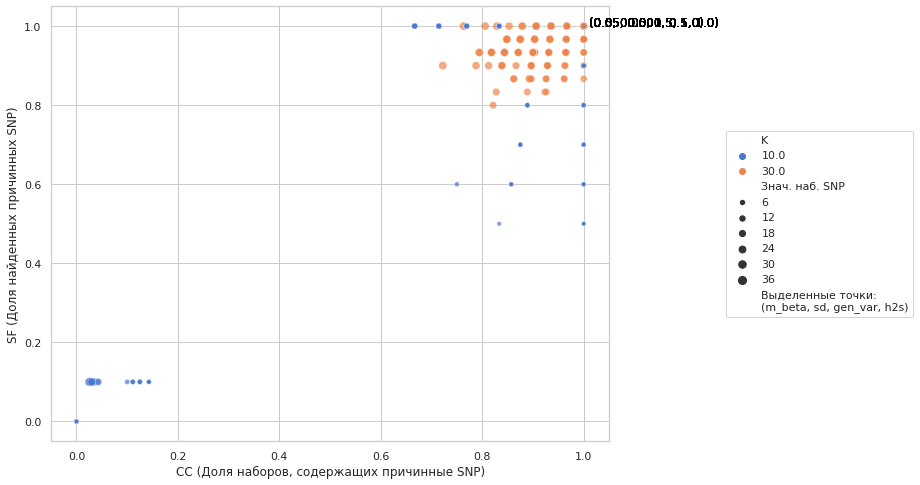

In [8]:
sns.set()
plt.figure(figsize=(10,8))
sns.set_theme(style="whitegrid")
ax = sns.scatterplot(d, 
                     x='CC', 
                     y='SF', 
                     hue='K', 
                     size=ct_name, 
                     palette="muted",  
                     alpha=.7,)
ax.set(xlabel=cc_name, ylabel=sf_name)

plt.plot([], [], ' ', label="Выделенные точки: \n(m_beta, sd, gen_var, h2s)")

for key, value in darr.iterrows():
    ax.text(value['CC']+0.01+value['x'], 
            value['SF']+value['y'], 
            value['params'], 
            horizontalalignment='left', 
            size='medium', 
            color='black')

plt.legend(loc='center left', bbox_to_anchor=(1.2, 0.5))
plt.show()

## Params -- CC/SF

In [9]:
def draw_violins(cur_y, cur_name, columns):
    sns.set(rc={"figure.figsize": (15, 10)})
    sns.set_theme(style="whitegrid")
    # get legend
    ax = sns.violinplot(d, 
                        x=columns[0], #!!!!!!!!!!!!!!!!!!!!! эт че
                        y=cur_y, 
                        hue='K')
    handles, labels = ax.get_legend_handles_labels()
    plt.clf()
    # draw
    fig, axs = plt.subplots(nrows=2, ncols=2)
    for i, c in enumerate(columns):
        row = i // 2
        col = i % 2
        ax = sns.violinplot(d, 
                            x=c, 
                            y=cur_y, 
                            hue='K', 
                            palette="muted",
                            alpha=.7,
                            ax=axs[row][col], 
                            legend=False,
                           cut=0)
        plt.setp(ax.collections, alpha=.88)
        ax.legend_.remove()
        ax.set(ylabel='', xlabel=c)
        ax.set(ylim=(0, 1))
    fig.supylabel(cur_name, y=0.5, x=0.07)
    fig.legend(handles, labels, loc='upper left', bbox_to_anchor=(0.9, 0.5))
    plt.show()

In [10]:
columnses = [["m_beta", "sd_beta", "gen_var", "h2s"], 
            ["theta","pIndep","phi","alpha"]]

<Figure size 1080x720 with 0 Axes>

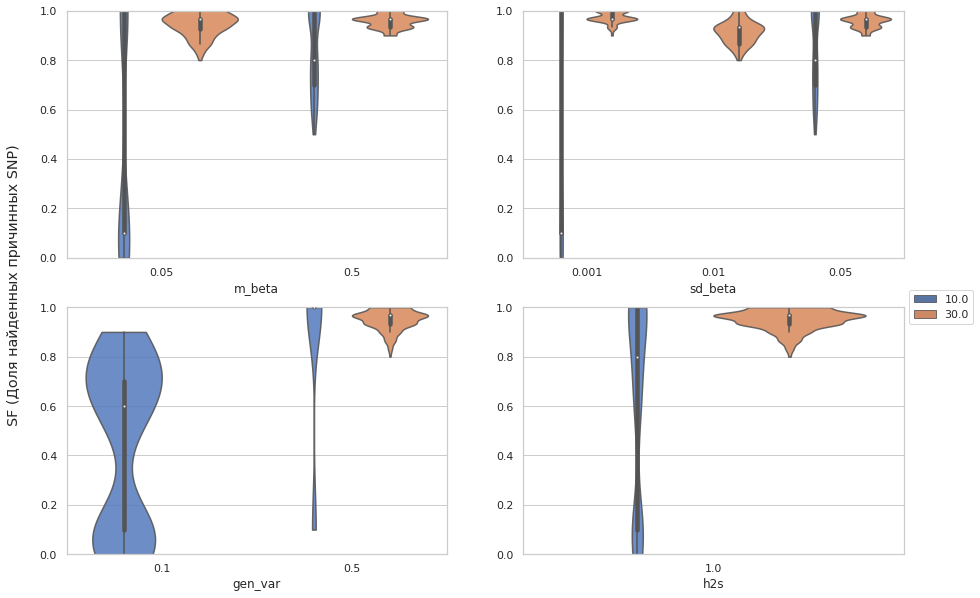

<Figure size 1080x720 with 0 Axes>

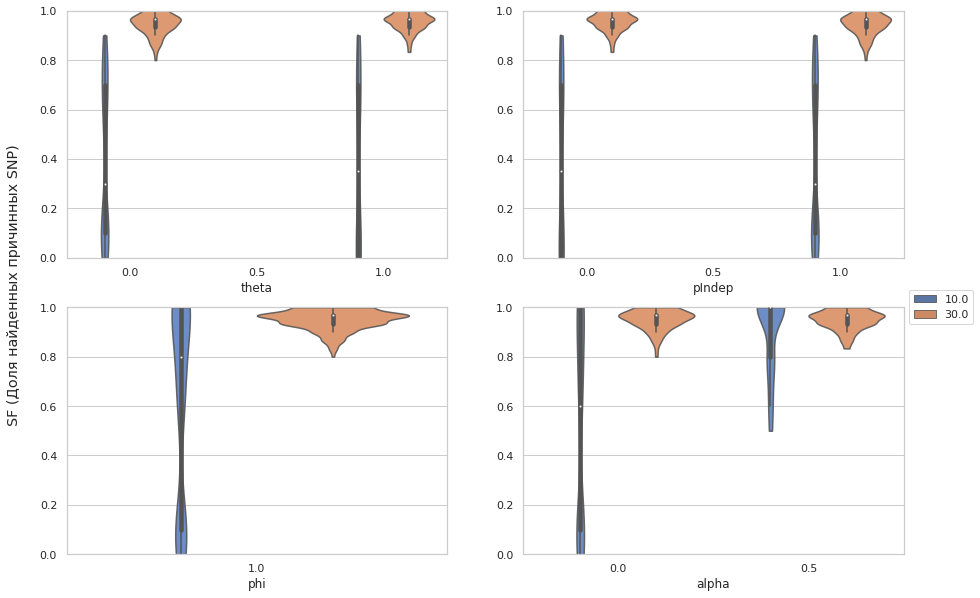

<Figure size 1080x720 with 0 Axes>

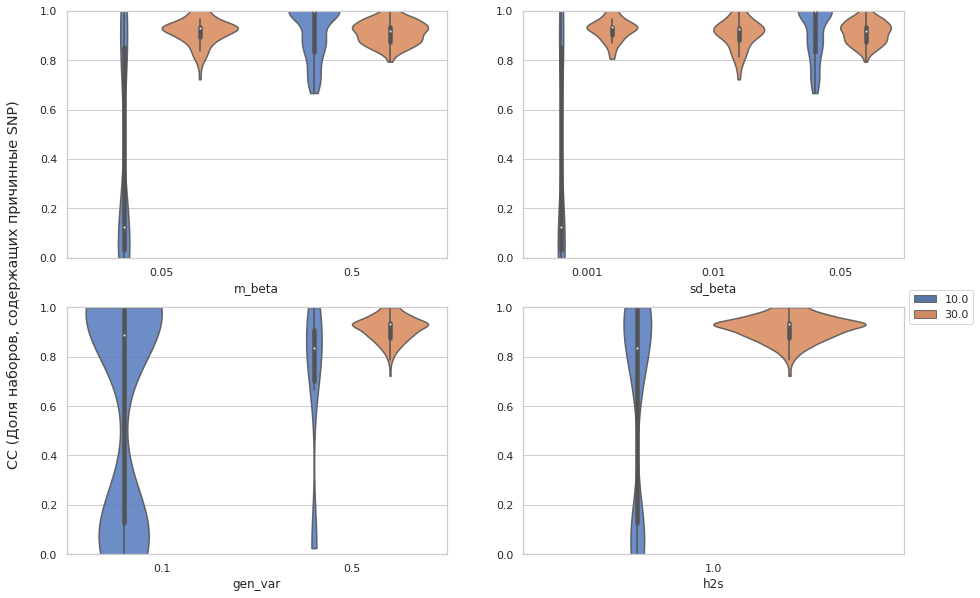

<Figure size 1080x720 with 0 Axes>

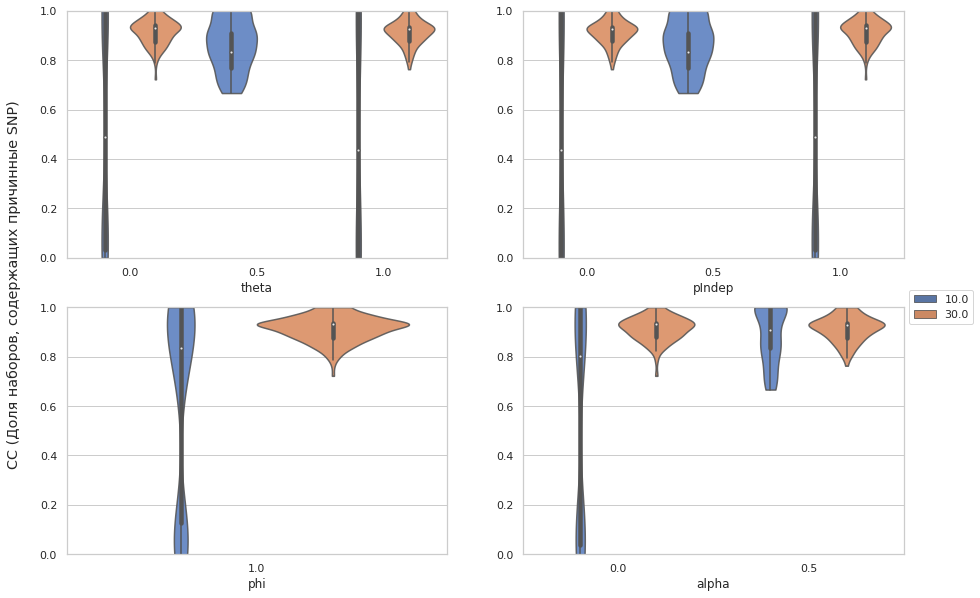

In [11]:
cur_ys = ['SF', 'CC']
cur_names = [sf_name, cc_name]

for cur_y, cur_name in zip(cur_ys, cur_names):
    for columns in columnses:
        draw_violins(cur_y, cur_name, columns)

## Dist per param.set

In [12]:
data['F1'] = 2/(1/data.clumps_causal+1/data.causal_found)
data.head()

,K,m_beta,sd_beta,gen_var,h2s,theta,pIndep,phi,alpha,clumps_total,clumps_causal,causal_found,F1,seed,clumps_not_causal,causal_not_found,params
0,10.0,0.05,0.001,0.1,1.0,0.0,1.0,1.0,0.0,7,0.14286,0.1,0.117648,2335020,0.85714,0.9,"(0.05, 0.001, 0.1, 1.0)"
1,10.0,0.05,0.001,0.1,1.0,0.0,1.0,1.0,0.0,9,0.11111,0.1,0.105263,2643371,0.88889,0.9,"(0.05, 0.001, 0.1, 1.0)"
2,10.0,0.05,0.001,0.1,1.0,0.0,1.0,1.0,0.0,7,0.14286,0.1,0.117648,2631448,0.85714,0.9,"(0.05, 0.001, 0.1, 1.0)"
3,10.0,0.05,0.001,0.1,1.0,0.0,1.0,1.0,0.0,8,0.12500,0.1,0.111111,7314238,0.87500,0.9,"(0.05, 0.001, 0.1, 1.0)"
4,10.0,0.05,0.001,0.1,1.0,0.0,1.0,1.0,0.0,8,0.12500,0.1,0.111111,1994957,0.87500,0.9,"(0.05, 0.001, 0.1, 1.0)"


In [17]:
Xs_cols = ['K', 'm_beta', 'sd_beta', 'gen_var', 'h2s', 'theta', 'pIndep', 'phi', 'alpha']
grouped = data.groupby(Xs_cols)
array_of_data = {traits: group for traits, group in grouped}

--------------------
Drawing for K=10!
{'K': 10, 'm_beta': 0.05, 'sd_beta': 0.001, 'gen_var': 0.1, 'h2s': 1.0, 'theta': 0.0, 'pIndep': 1.0, 'phi': 1.0, 'alpha': 0.0}


,mean,std
trait,,
F1,0.084056,0.049909
causal_found,0.075000,0.044426
clumps_causal,0.095933,0.057532


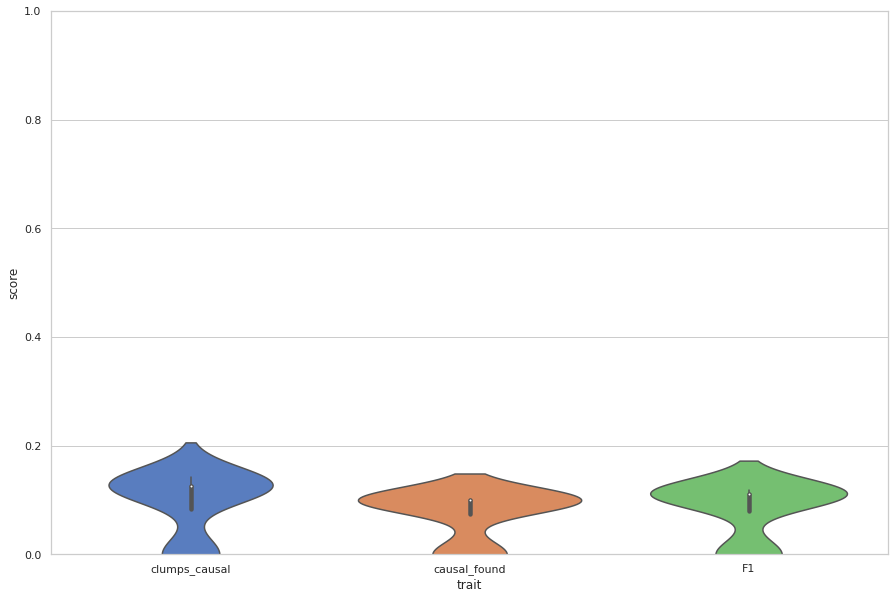

--------------------
--------------------
No data for K=30!
--------------------
--------------------
Drawing for K=10!
{'K': 10, 'm_beta': 0.05, 'sd_beta': 0.001, 'gen_var': 0.1, 'h2s': 1.0, 'theta': 1.0, 'pIndep': 0.0, 'phi': 1.0, 'alpha': 0.0}


,mean,std
trait,,
F1,0.043596,0.054840
causal_found,0.040000,0.050262
clumps_causal,0.048056,0.060658


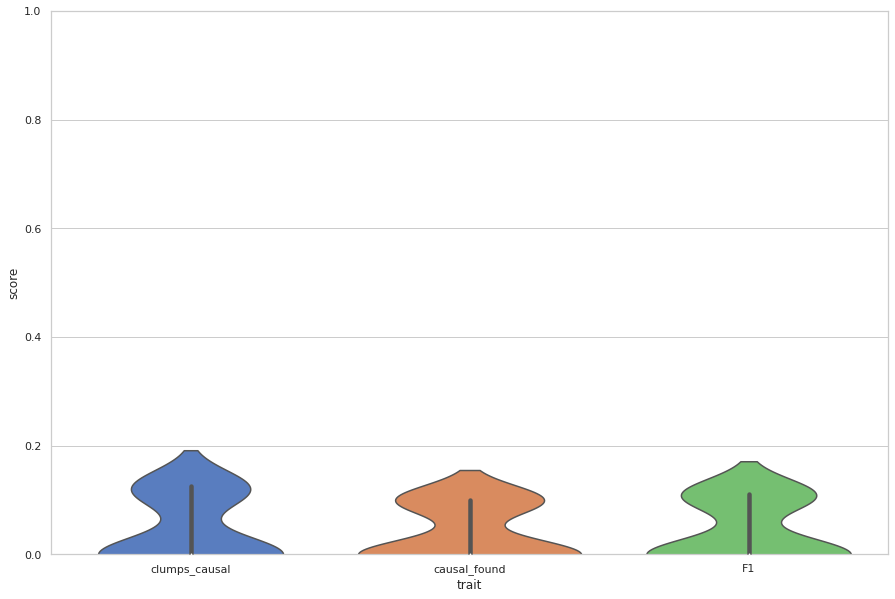

--------------------
--------------------
No data for K=30!
--------------------
--------------------
Drawing for K=10!
{'K': 10, 'm_beta': 0.05, 'sd_beta': 0.001, 'gen_var': 0.5, 'h2s': 1.0, 'theta': 0.0, 'pIndep': 1.0, 'phi': 1.0, 'alpha': 0.0}


,mean,std
trait,,
F1,0.047569,0.004981
causal_found,0.100000,0.000000
clumps_causal,0.031345,0.004453


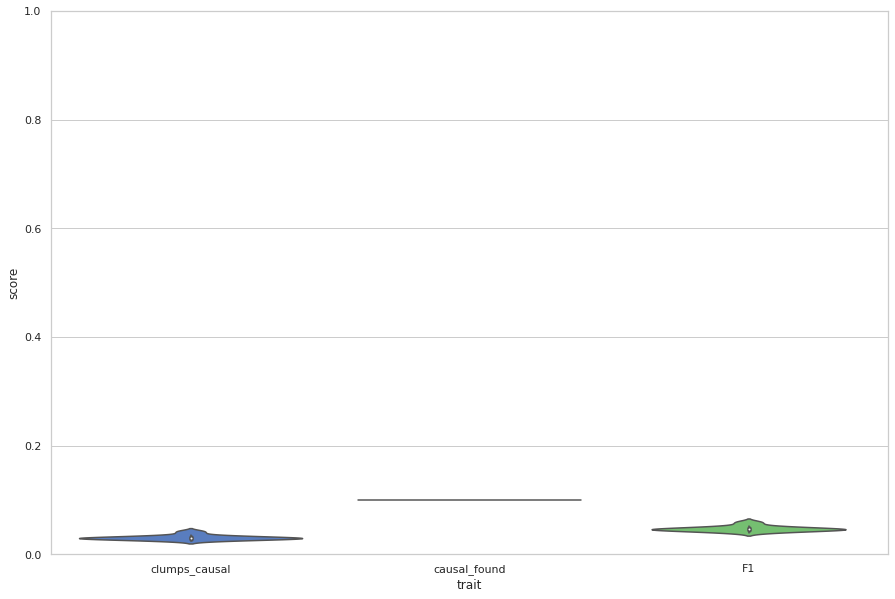

--------------------
--------------------
No data for K=30!
--------------------
--------------------
Drawing for K=10!
{'K': 10, 'm_beta': 0.05, 'sd_beta': 0.001, 'gen_var': 0.5, 'h2s': 1.0, 'theta': 0.5, 'pIndep': 0.5, 'phi': 1.0, 'alpha': 0.0}


,mean,std
trait,,
F1,0.933558,0.055590
causal_found,1.000000,0.000000
clumps_causal,0.880061,0.094384


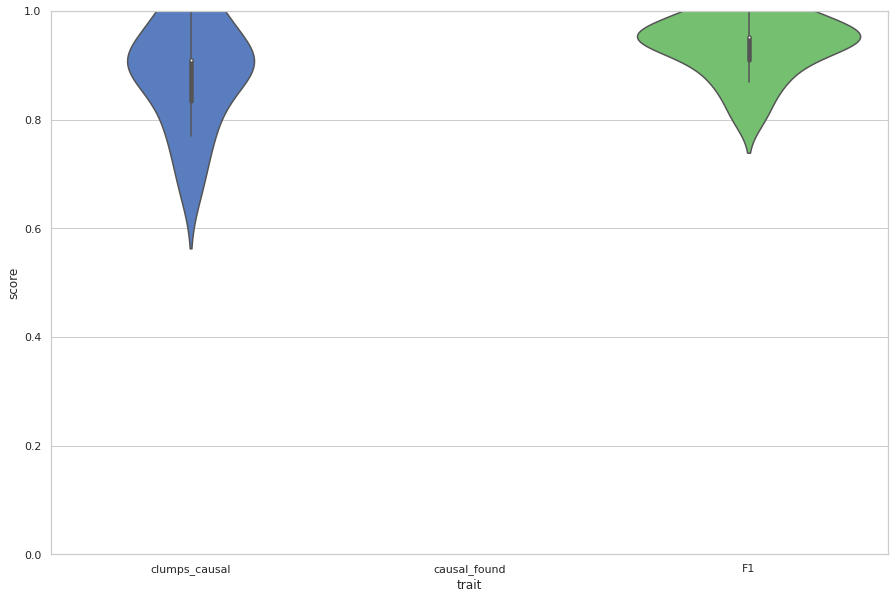

--------------------
--------------------
No data for K=30!
--------------------
--------------------
Drawing for K=10!
{'K': 10, 'm_beta': 0.05, 'sd_beta': 0.001, 'gen_var': 0.5, 'h2s': 1.0, 'theta': 0.5, 'pIndep': 0.5, 'phi': 1.0, 'alpha': 0.5}


,mean,std
trait,,
F1,0.951443,0.058030
causal_found,1.000000,0.000000
clumps_causal,0.912703,0.101346


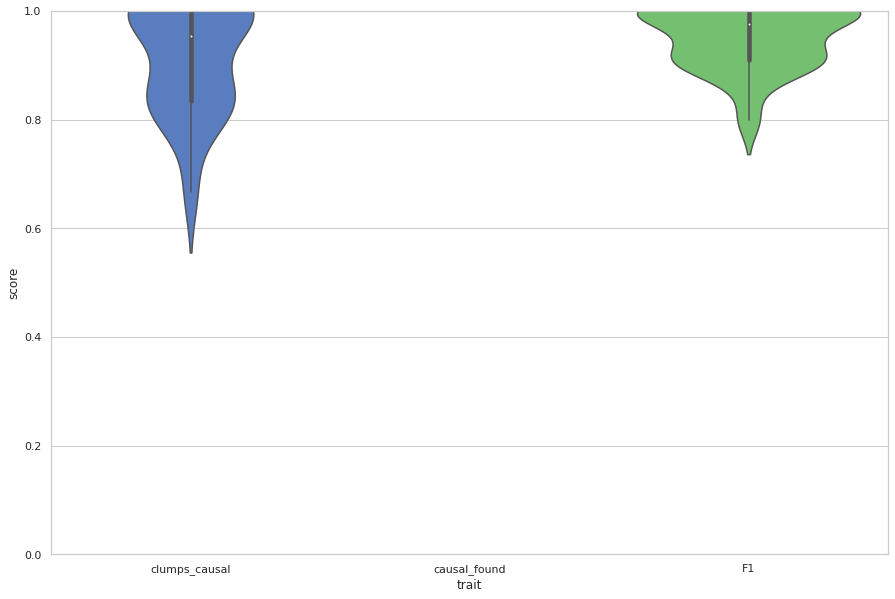

--------------------
--------------------
No data for K=30!
--------------------
--------------------
Drawing for K=10!
{'K': 10, 'm_beta': 0.5, 'sd_beta': 0.05, 'gen_var': 0.1, 'h2s': 1.0, 'theta': 0.0, 'pIndep': 1.0, 'phi': 1.0, 'alpha': 0.0}


,mean,std
trait,,
F1,0.819849,0.083472
causal_found,0.715000,0.113671
clumps_causal,0.973908,0.053887


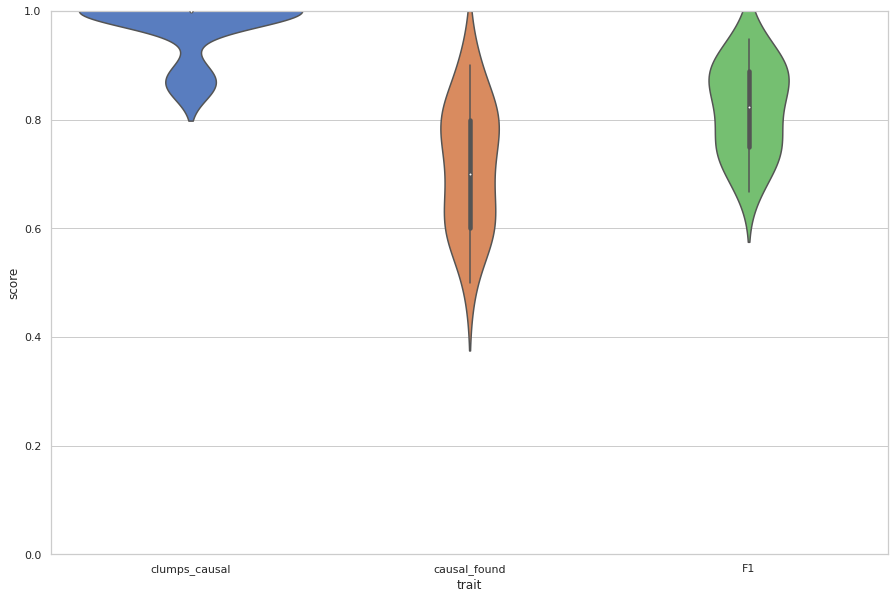

--------------------
--------------------
No data for K=30!
--------------------
--------------------
Drawing for K=10!
{'K': 10, 'm_beta': 0.5, 'sd_beta': 0.05, 'gen_var': 0.1, 'h2s': 1.0, 'theta': 0.0, 'pIndep': 1.0, 'phi': 1.0, 'alpha': 0.5}


,mean,std
trait,,
F1,0.805657,0.084775
causal_found,0.695000,0.114593
clumps_causal,0.974306,0.053749


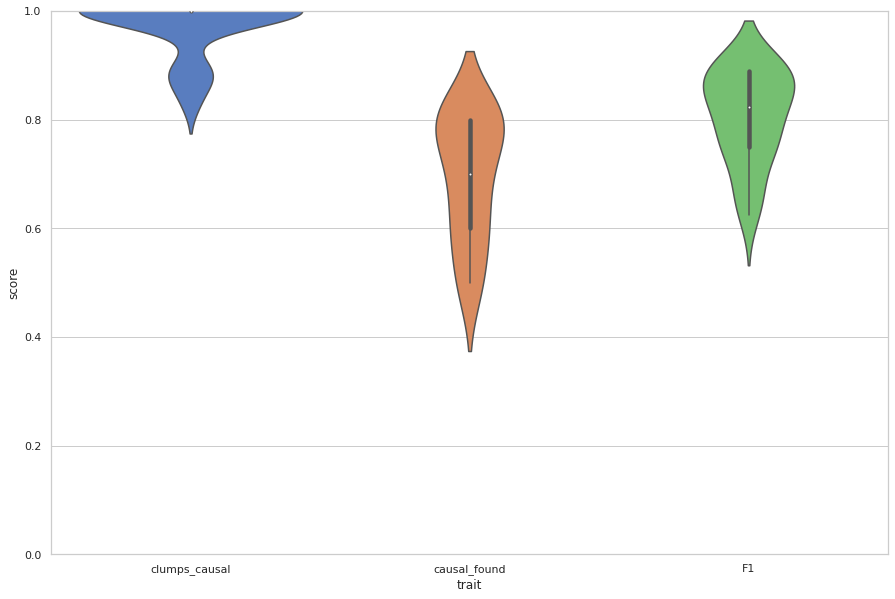

--------------------
--------------------
No data for K=30!
--------------------
--------------------
Drawing for K=10!
{'K': 10, 'm_beta': 0.5, 'sd_beta': 0.05, 'gen_var': 0.1, 'h2s': 1.0, 'theta': 1.0, 'pIndep': 0.0, 'phi': 1.0, 'alpha': 0.0}


,mean,std
trait,,
F1,0.823164,0.081050
causal_found,0.725000,0.106992
clumps_causal,0.962302,0.071848


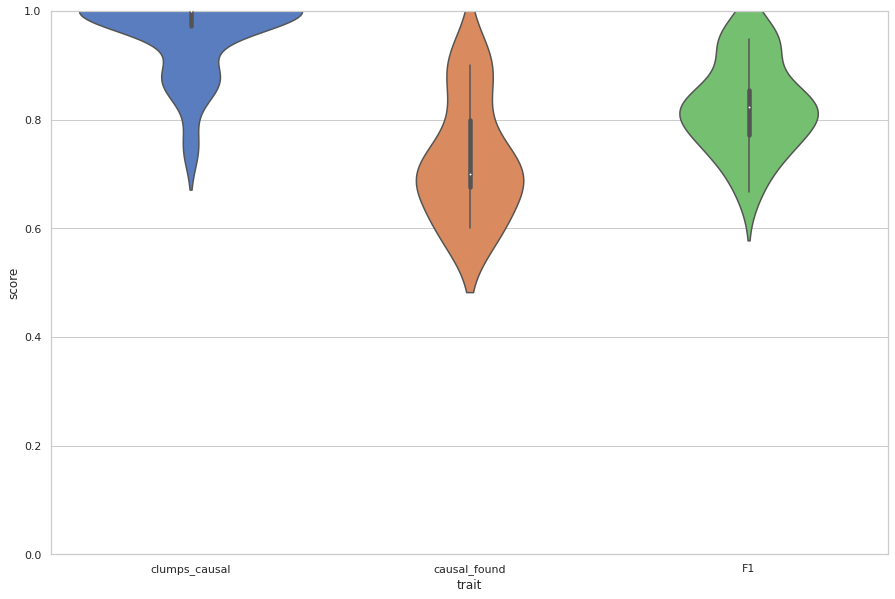

--------------------
--------------------
No data for K=30!
--------------------
--------------------
Drawing for K=10!
{'K': 10, 'm_beta': 0.5, 'sd_beta': 0.05, 'gen_var': 0.5, 'h2s': 1.0, 'theta': 0.5, 'pIndep': 0.5, 'phi': 1.0, 'alpha': 0.0}


,mean,std
trait,,
F1,0.926755,0.053423
causal_found,1.000000,0.000000
clumps_causal,0.867873,0.092439


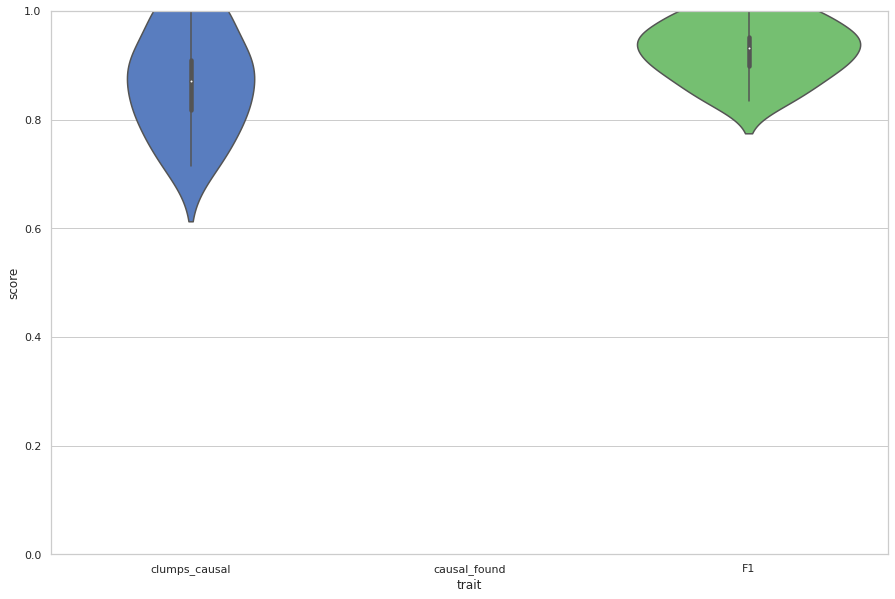

--------------------
--------------------
No data for K=30!
--------------------
--------------------
Drawing for K=10!
{'K': 10, 'm_beta': 0.5, 'sd_beta': 0.05, 'gen_var': 0.5, 'h2s': 1.0, 'theta': 0.5, 'pIndep': 0.5, 'phi': 1.0, 'alpha': 0.5}


,mean,std
trait,,
F1,0.872730,0.054228
causal_found,1.000000,0.000000
clumps_causal,0.778156,0.086679


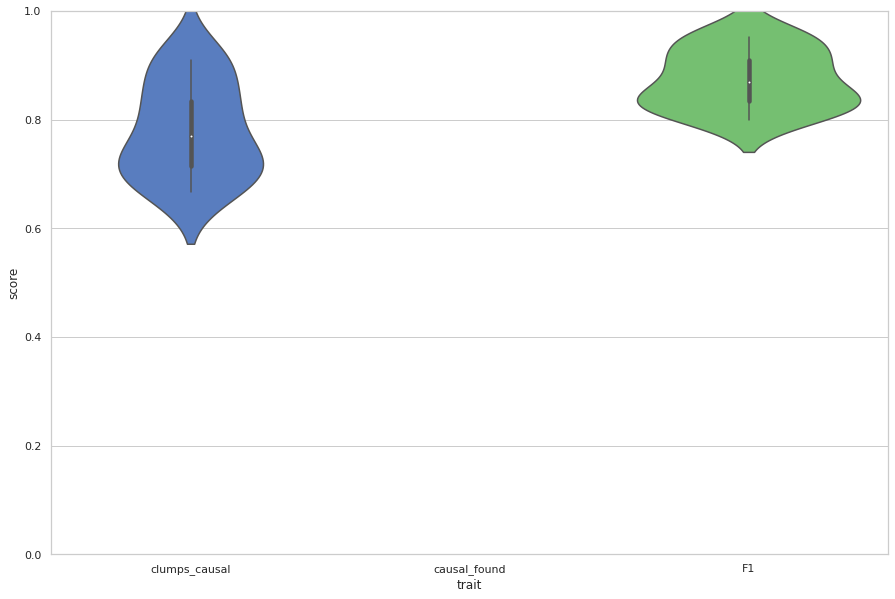

--------------------
--------------------
No data for K=30!
--------------------
--------------------
No data for K=10!
--------------------
--------------------
Drawing for K=30!
{'K': 30, 'm_beta': 0.05, 'sd_beta': 0.001, 'gen_var': 0.5, 'h2s': 1.0, 'theta': 0.0, 'pIndep': 1.0, 'phi': 1.0, 'alpha': 0.5}


,mean,std
trait,,
F1,0.951066,0.027627
causal_found,0.973335,0.025592
clumps_causal,0.930762,0.042123


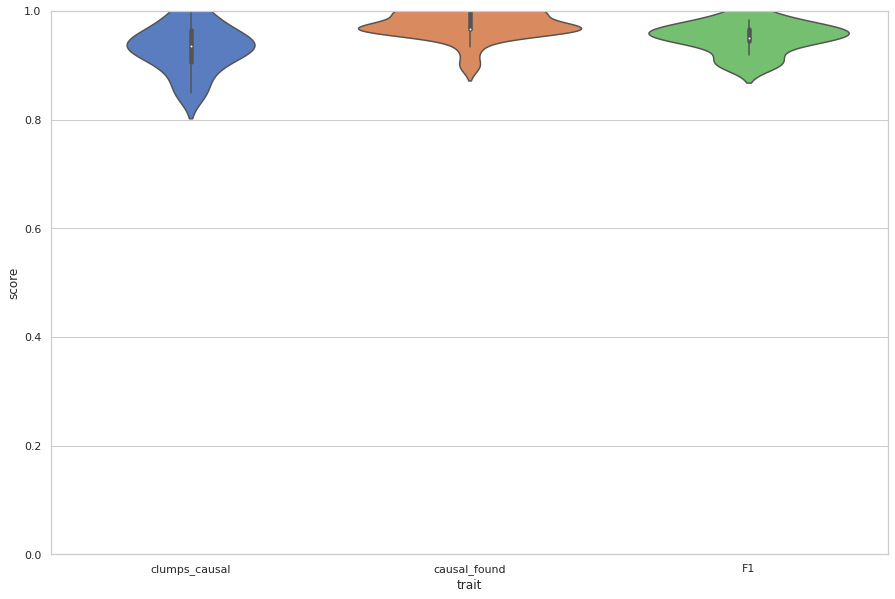

--------------------
--------------------
No data for K=10!
--------------------
--------------------
Drawing for K=30!
{'K': 30, 'm_beta': 0.05, 'sd_beta': 0.001, 'gen_var': 0.5, 'h2s': 1.0, 'theta': 1.0, 'pIndep': 0.0, 'phi': 1.0, 'alpha': 0.0}


,mean,std
trait,,
F1,0.947906,0.021862
causal_found,0.975001,0.021289
clumps_causal,0.923301,0.038995


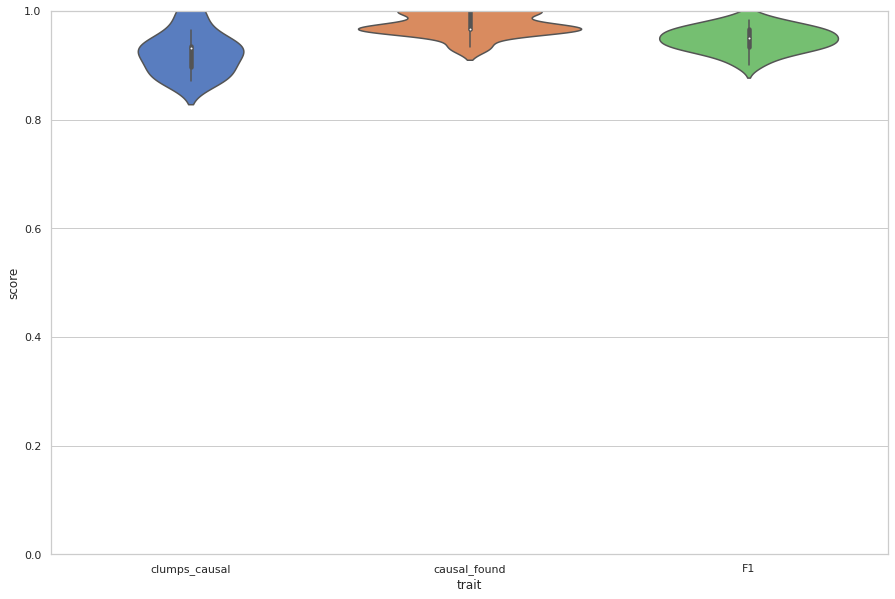

--------------------
--------------------
No data for K=10!
--------------------
--------------------
Drawing for K=30!
{'K': 30, 'm_beta': 0.05, 'sd_beta': 0.001, 'gen_var': 0.5, 'h2s': 1.0, 'theta': 1.0, 'pIndep': 0.0, 'phi': 1.0, 'alpha': 0.5}


,mean,std
trait,,
F1,0.943459,0.031549
causal_found,0.973334,0.023195
clumps_causal,0.916740,0.050944


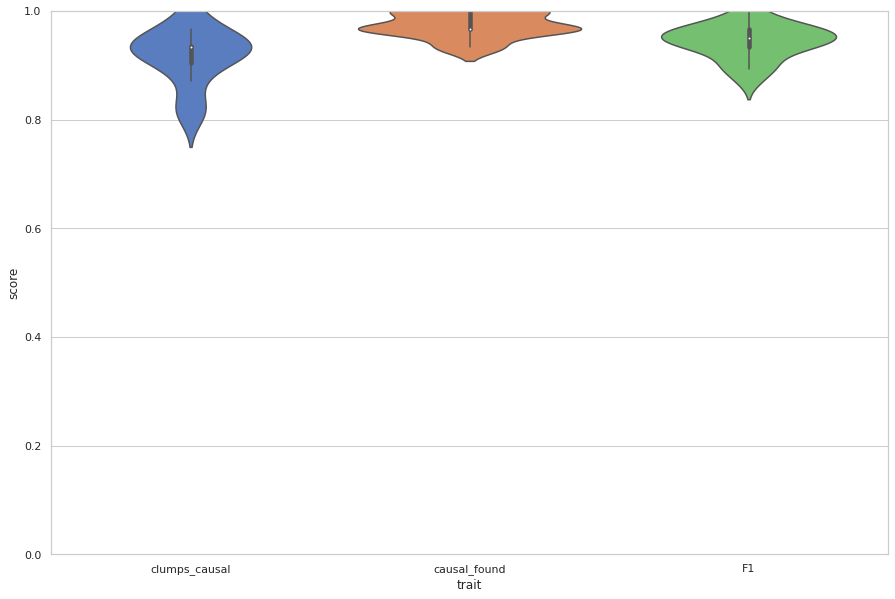

--------------------
--------------------
No data for K=10!
--------------------
--------------------
Drawing for K=30!
{'K': 30, 'm_beta': 0.05, 'sd_beta': 0.01, 'gen_var': 0.5, 'h2s': 1.0, 'theta': 0.0, 'pIndep': 1.0, 'phi': 1.0, 'alpha': 0.0}


,mean,std
trait,,
F1,0.899524,0.046836
causal_found,0.906667,0.049085
clumps_causal,0.894949,0.063643


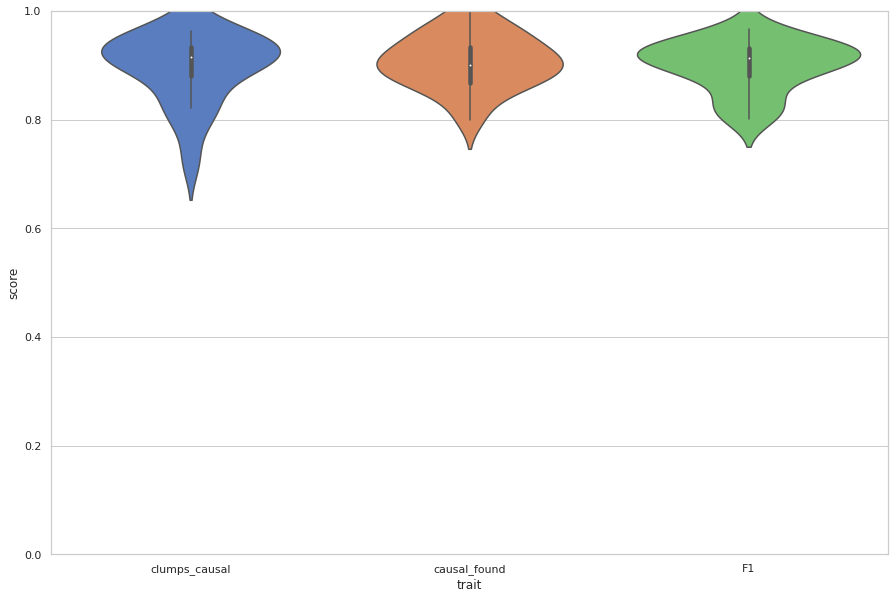

--------------------
--------------------
No data for K=10!
--------------------
--------------------
Drawing for K=30!
{'K': 30, 'm_beta': 0.05, 'sd_beta': 0.01, 'gen_var': 0.5, 'h2s': 1.0, 'theta': 0.0, 'pIndep': 1.0, 'phi': 1.0, 'alpha': 0.5}


,mean,std
trait,,
F1,0.912425,0.037251
causal_found,0.914999,0.039698
clumps_causal,0.911733,0.054534


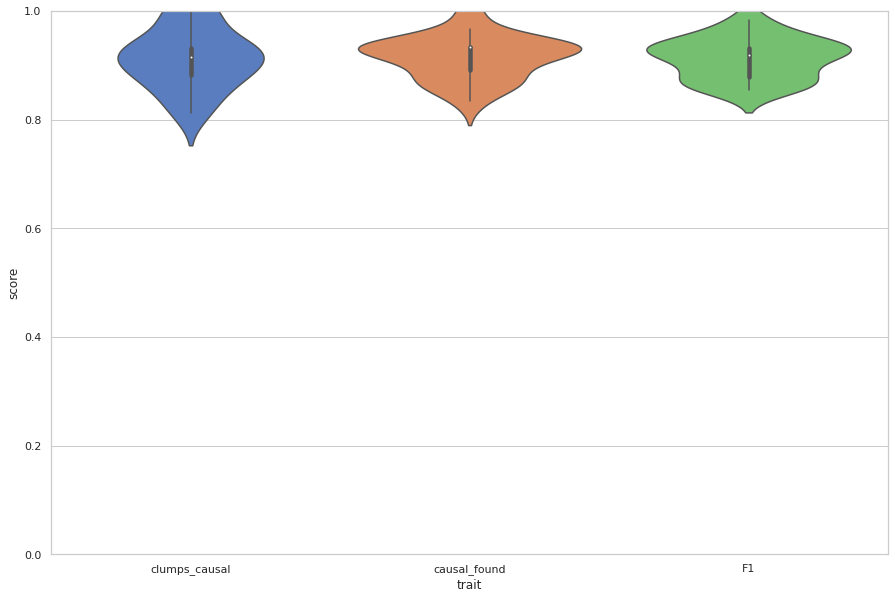

--------------------
--------------------
No data for K=10!
--------------------
--------------------
Drawing for K=30!
{'K': 30, 'm_beta': 0.05, 'sd_beta': 0.01, 'gen_var': 0.5, 'h2s': 1.0, 'theta': 1.0, 'pIndep': 0.0, 'phi': 1.0, 'alpha': 0.5}


,mean,std
trait,,
F1,0.911283,0.037756
causal_found,0.916666,0.047757
clumps_causal,0.909736,0.062563


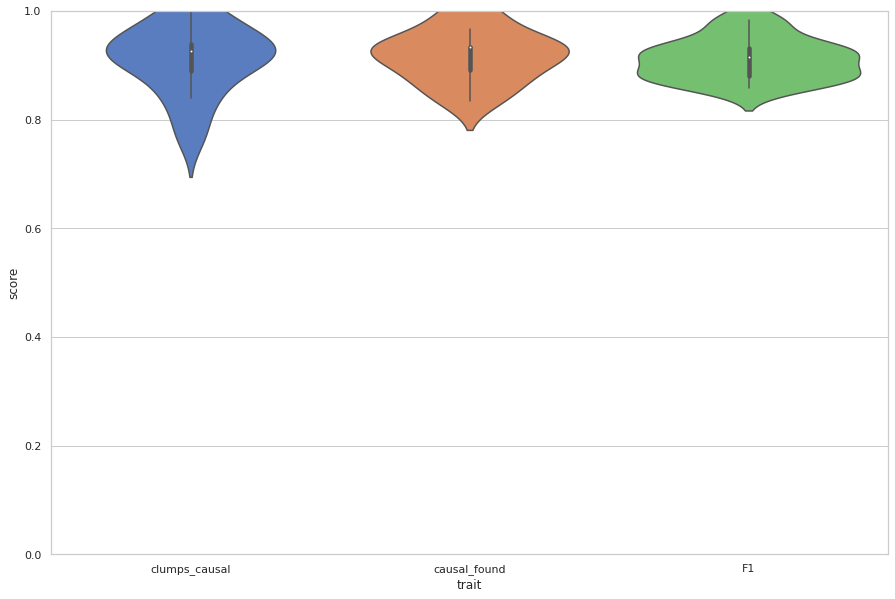

--------------------
--------------------
No data for K=10!
--------------------
--------------------
Drawing for K=30!
{'K': 30, 'm_beta': 0.5, 'sd_beta': 0.05, 'gen_var': 0.5, 'h2s': 1.0, 'theta': 0.0, 'pIndep': 1.0, 'phi': 1.0, 'alpha': 0.0}


,mean,std
trait,,
F1,0.941390,0.033303
causal_found,0.966667,0.026492
clumps_causal,0.918284,0.047819


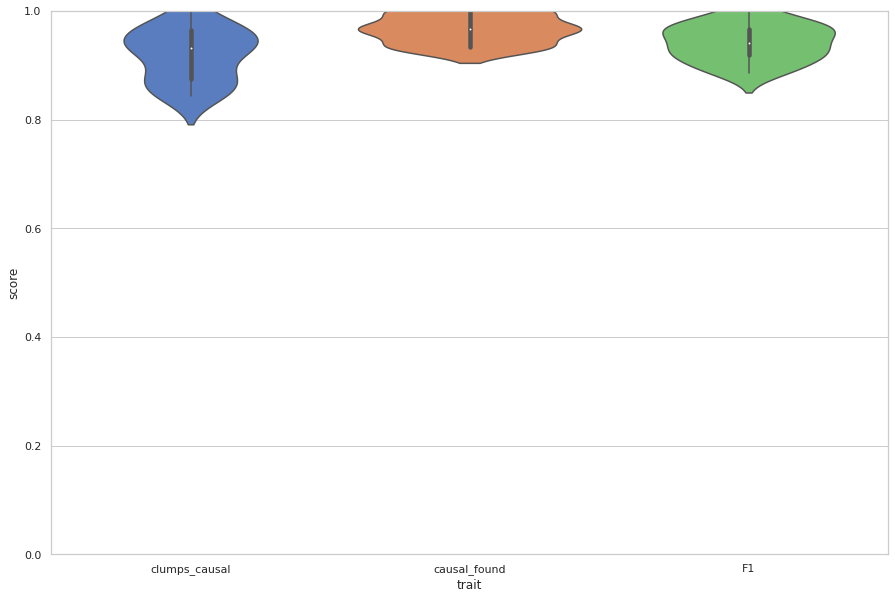

--------------------
--------------------
No data for K=10!
--------------------
--------------------
Drawing for K=30!
{'K': 30, 'm_beta': 0.5, 'sd_beta': 0.05, 'gen_var': 0.5, 'h2s': 1.0, 'theta': 0.0, 'pIndep': 1.0, 'phi': 1.0, 'alpha': 0.5}


,mean,std
trait,,
F1,0.936964,0.030063
causal_found,0.956668,0.021900
clumps_causal,0.918856,0.045202


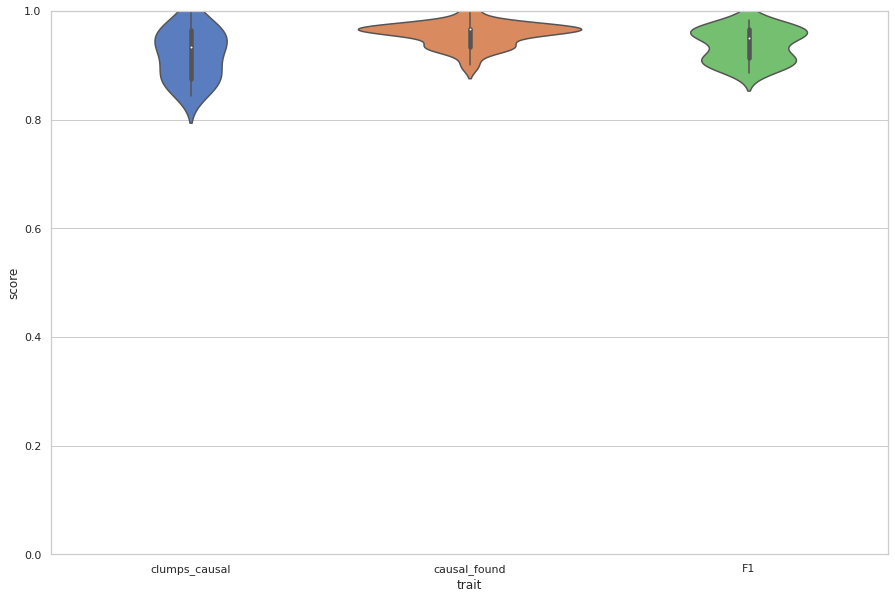

--------------------
--------------------
No data for K=10!
--------------------
--------------------
Drawing for K=30!
{'K': 30, 'm_beta': 0.5, 'sd_beta': 0.05, 'gen_var': 0.5, 'h2s': 1.0, 'theta': 1.0, 'pIndep': 0.0, 'phi': 1.0, 'alpha': 0.0}


,mean,std
trait,,
F1,0.934338,0.026590
causal_found,0.953334,0.027361
clumps_causal,0.917282,0.042950


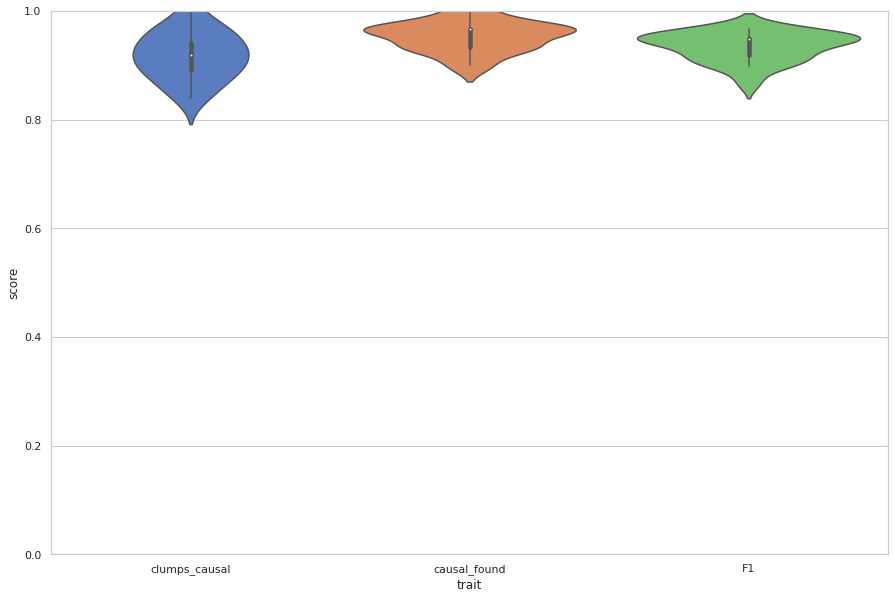

--------------------
--------------------
No data for K=10!
--------------------
--------------------
Drawing for K=30!
{'K': 30, 'm_beta': 0.5, 'sd_beta': 0.05, 'gen_var': 0.5, 'h2s': 1.0, 'theta': 1.0, 'pIndep': 0.0, 'phi': 1.0, 'alpha': 0.5}


,mean,std
trait,,
F1,0.923489,0.034051
causal_found,0.953333,0.033159
clumps_causal,0.896771,0.049100


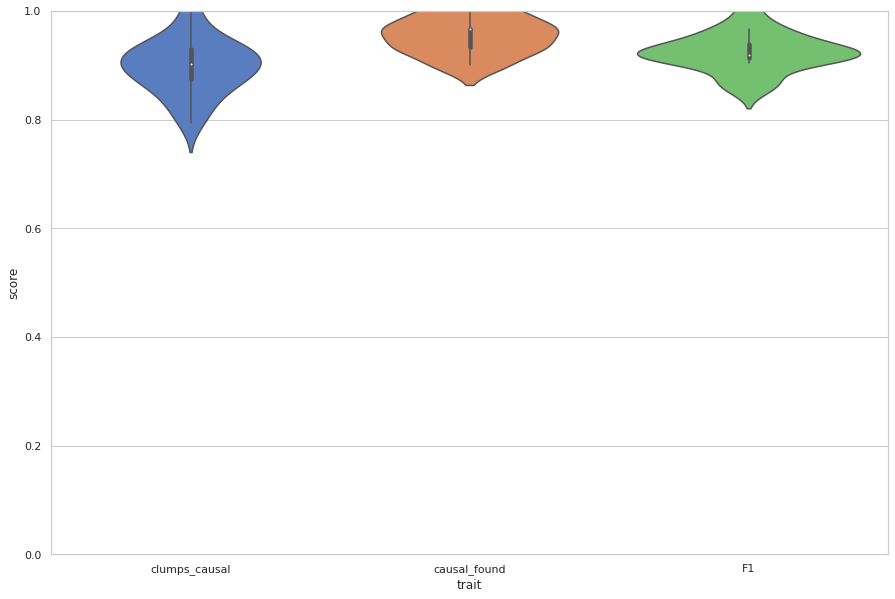

--------------------


In [30]:
already_used = set()
for _traits in array_of_data:
    traits = list(deepcopy(_traits))
    for K in [10, 30]:
        print('--------------------')
        traits[0]=K
        try:
            cur_data = array_of_data[tuple(traits)]
            print(f"Drawing for K={K}!")
        except KeyError:
            print(f'No data for K={K}!')
            print('--------------------')
            continue
        datas = []
        cols = ['clumps_causal', 'causal_found', 'F1']
        for col in cols:
            cur_data['trait'] = col
            d1 = cur_data[[col, 'trait']].rename(columns={col:'score'})
            datas.append(d1)
        cur_data_m = pd.concat(datas)
        grouped = cur_data_m.groupby('trait')['score'].agg(['mean', 'std'])
        print({k: t for k, t in zip(Xs_cols, traits)})
        display(grouped)
        ax = sns.violinplot(data=cur_data_m, 
                       x='trait', 
                       y='score',
                       palette="muted",
                       alpha=.6,)
        ax.set(ylim=(0, 1))
        plt.show()
        print('--------------------')
    print('================================================================')

In [37]:
!pwd

/media/MIRROR/ukb_finngen/1000genomes
